# Using scikit-learn for linear regression

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

Two drawbacks of linear regression: 
1. May overfit the data 
2. Cannot model the non-linearity in the parameter space (It can model non-linear feature space but fails to show model correaltion in the dataset between features) 

The main way linear regression fits data is by fitting weights for the linear variables ($x$ = given as independent variable) and estimate the dependent variable ($y$ = in this case) 

\begin{equation*}
y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + b_{3}x_{3} + .... + \epsilon
\end{equation*}

### Mean squared errors
To get the best weights, you usually minimize the sum of squared residuals (SSR) or Mean Squared Errors (MSR) for all observations: 
\begin{equation*} 
MSE = \frac{1}{m}\sum_{i=1}^{i=m}(y^{(i)}-𝐱^{(i)}\theta)^2 
\end{equation*}
This approach is called the method of ordinary least squares.
Link: https://realpython.com/linear-regression-in-python/#implementing-linear-regression-in-python


### Coefficient of determination
What % of total variation in y is described by the line or by the variation in $x$? 

This is the coefficient of determination or $R-square$. 

To answer this question we could look at what % of variation is NOT described by the line or by x -- that would be the $SE_{line}$ since that is THE error we get for the fitting. Therefore the remaining of that would be which is explained by the line

$$R_{square} = 1- \frac{SE_{line}}{SE_{y}}$$

If close to 1 then lot of the variation in y is described by variation in x


## Import necessary modules 

In [1]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_palette('deep')
#To ensure we get similar results at each run -- if not initiated every successive will give more random 
#shuffled indices risking the possibility of the algo seeing the entire dataset! 
np.random.seed(42)

# Solving for the parameters

To find the value that minimizes the cost function (MSE) we have following options: 
1. Normal equation OR Single value decomposition (SVD) -- Analytical solution to the problem. Inverting of the larger features is a bottle neck as the dimension of the features increases. 


2. Numerical solution by minimizing the cost function by moving along the gradient of the same. -- GRADIENT DESCENT. In this case we do not solve the equation EXACTLY but solve to an acceptable value given by the value of the LOSS FUNCTION or the gradient 


## 1. Normal equation

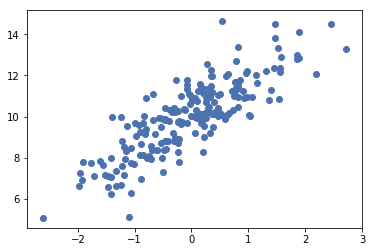

In [2]:
x = np.random.randn(200,1) #Normally distributed x around 3.0 
y = 10.0 + 1.5 * x + np.random.randn(200,1) #Introducing some noise 
plt.scatter(x,y)

Value of weights: 10.089980744101753, 1.6008697534021739
MSE:0.9605306224045631
R-square: 0.697



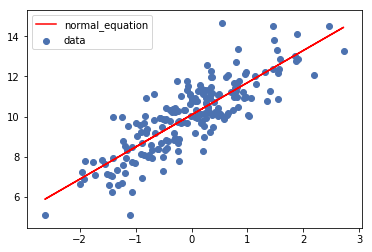

In [3]:
#NORMAL EQUATION -- Finding the weights 
x_b = np.c_[np.ones((200,1)),x] #Here the x is 2dim array -- np.c_ column stacking
weights = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print('Value of weights: {}, {}'.format(weights[0][0],weights[1][0]))

y_new = x_b.dot(weights)
plt.plot(x_b[:,1],y_new,'r-',label='normal_equation')
plt.scatter(x,y,label='data')
plt.legend()
print('MSE:{}'.format(np.sum((y_new-y)**2)/len(y_new)))

#Coefficient of determination
def sq_err_cal(data_1,data_2):
    return(np.sum((data_1-data_2)**2))
r2=1-sq_err_cal(y_new,y)/sq_err_cal(y,np.mean(y))
print('R-square: {0}\n'.format(round(r2,3)))


### Using sklearn

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
LinReg = LinearRegression()
model = LinReg.fit(x,y)

print('SCIKIT LEARN LINEAR REGRESSION')
print('Value of weights: {}, {}'.format(model.intercept_[0],model.coef_[0][0]))
print('MSE:{}'.format(mean_squared_error(model.predict(x),y)))
print('R-square:{}'.format(r2_score(y,model.predict(x))))

SCIKIT LEARN LINEAR REGRESSION
Value of weights: 10.089980744101753, 1.6008697534021723
MSE:0.9605306224045634
R-square:0.6970664852772347


## 2. Gradient Descent

To solve the minimization problem numerically. Useful when dimensionality of data is large and the number of instances make calculating the inverse/pseudoinverse difficult. 

We minimize the gradient of MSE:
\begin{equation*} 
MSE = \frac{1}{m}\sum_{i=1}^{i=m}(y^{(i)}-𝐱^{(i)}\theta)^2 
\end{equation*}

\begin{equation*} 
\nabla_{\theta}(MSE(\theta,X)) = \frac{-2}{m}\sum_{i=1}^{i=m}(y^{(i)}-𝐱^{(i)}\theta)(x^{(i)}) 
\end{equation*}

\begin{equation*} 
\nabla_{\theta}(MSE(\theta,X)) = \frac{2}{m}X^{T}.(X\theta-Y)
\end{equation*}

### Batch Gradient Descent

In [5]:
def loss_func(X,Y,theta):
    return(np.mean((Y-X.dot(theta))**2))

#BATCH GRADIENT DESCENT 
def grad_batch(X,Y,theta_guess,eta=0.9,n_iter=1000,tol=1E-5):
    m = float(np.shape(X)[0])
    for i in range(n_iter):
        gradient = 2/m * X.T.dot(X.dot(theta_guess)-Y)
        if np.max(abs(gradient)<=tol):
            return(theta_guess)
            break
        else:
            theta_guess = theta_guess - eta * gradient
    return(theta_guess)

X = x_b.reshape(200,2)
Y = y.reshape(200,1)

theta_guess = np.random.randn(2,1)
theta_opt = grad_batch(X,Y,theta_guess)
print('BATCH GRADIENT DESCENT')
print('Value of weights: {}, {}'.format(theta_opt[0][0],theta_opt[1][0]))
print('MSE: {}'.format(loss_func(X,Y,theta_opt)))
print('R-square:{}'.format(r2_score(y,X.dot(theta_opt))))

BATCH GRADIENT DESCENT
Value of weights: 10.089998501410582, 1.600864834914306
MSE: 0.960530622747911
R-square:0.6970664851689492


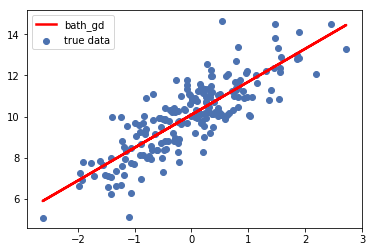

In [6]:
plt.scatter(X[:,1],Y,label='true data')
plt.plot(X[:,1],X.dot(theta_opt),'r-',linewidth='2.5',label='bath_gd')
plt.legend()

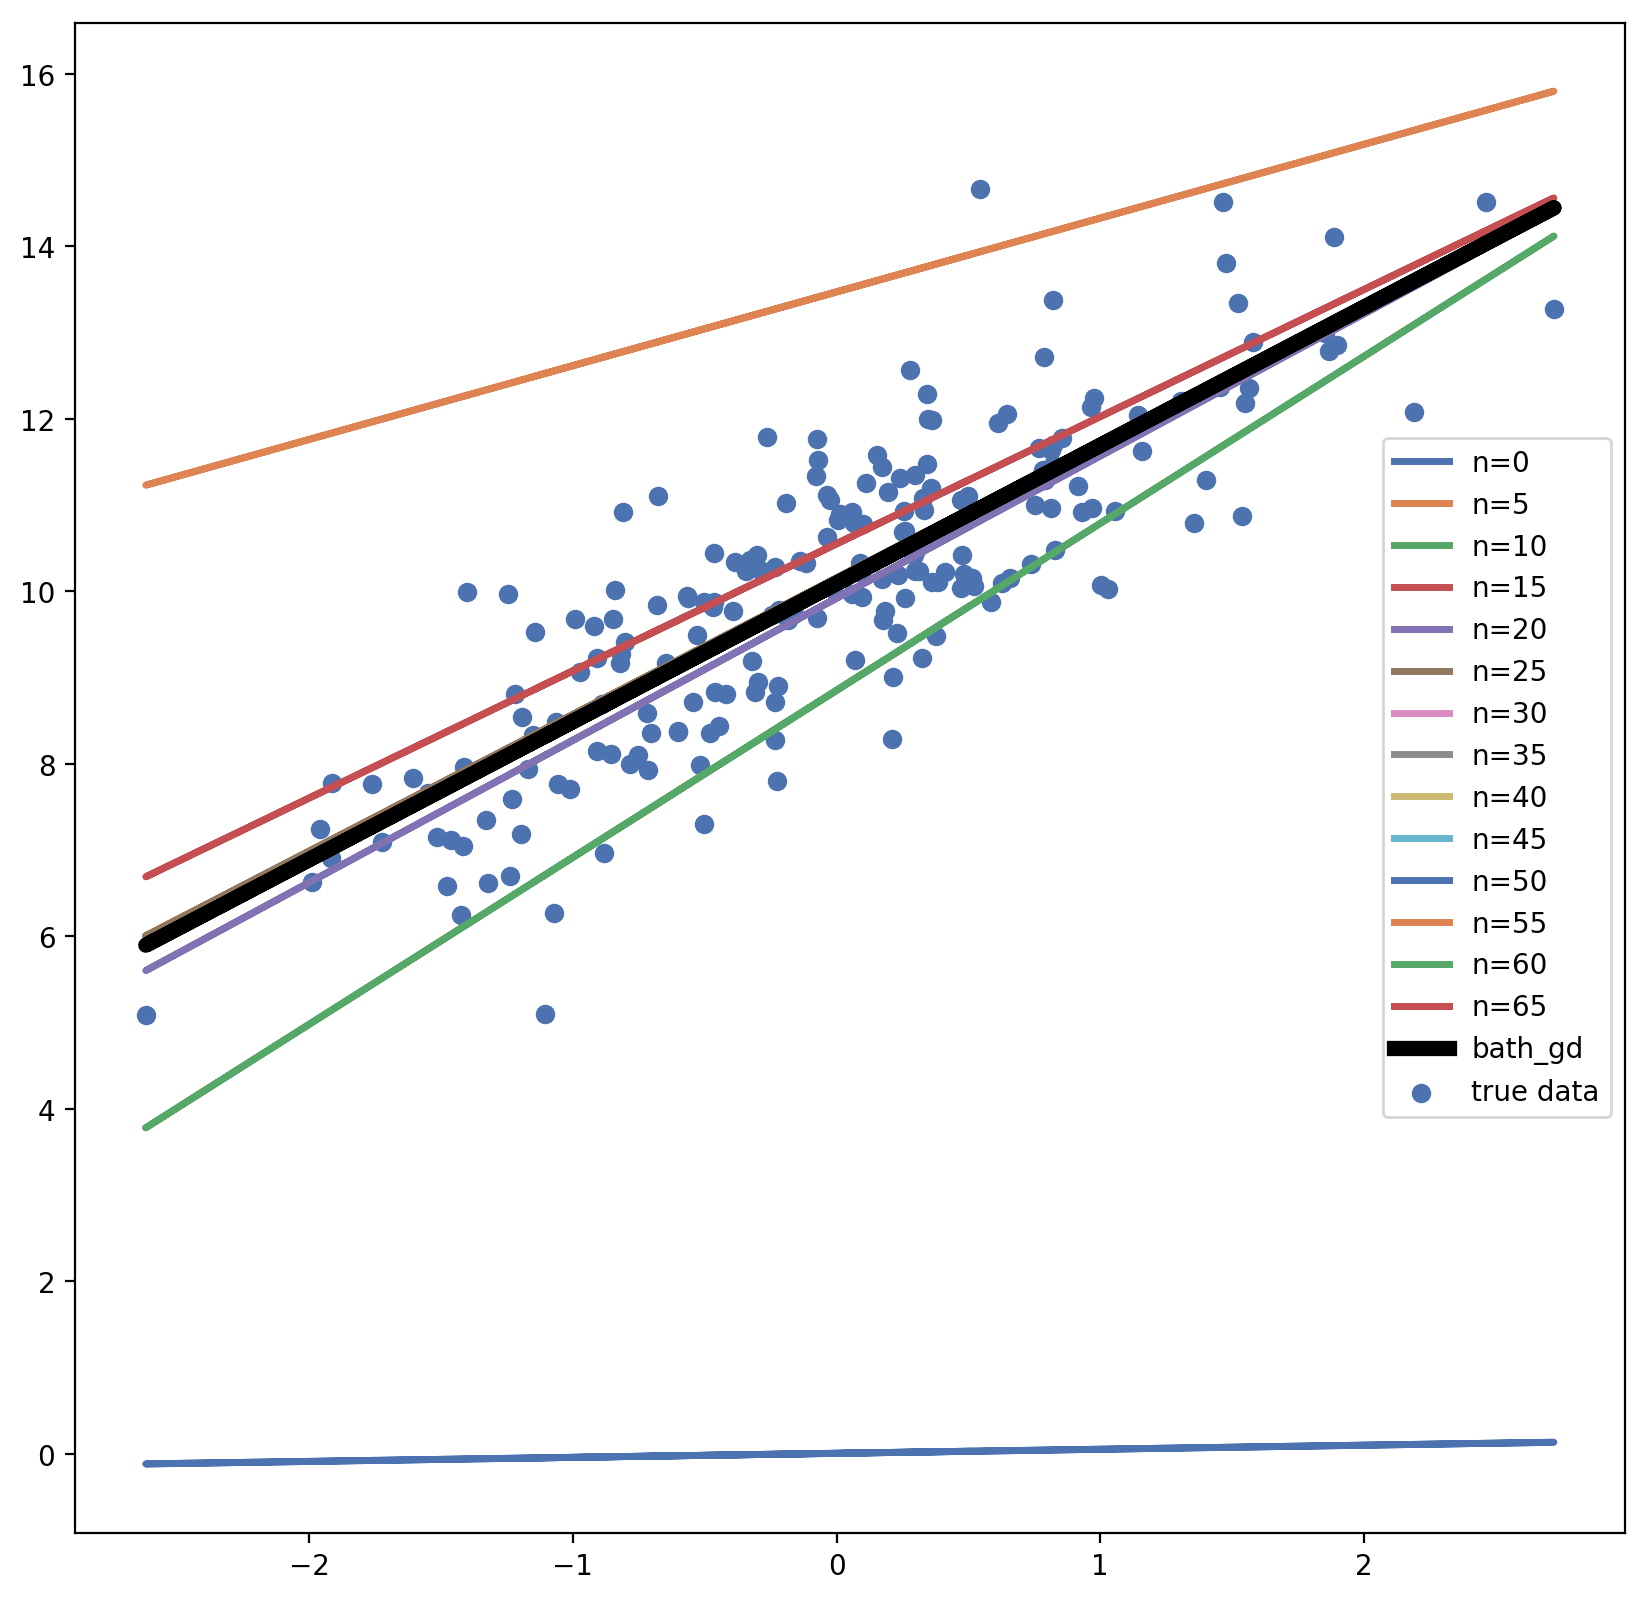

In [7]:
#BATCH GRADIENT DESCENT 
def grad_batch_plots(X,Y,theta_guess,eta=0.9,n_iter=1000,tol=1E-5):
    m = float(np.shape(X)[0])
    for i in range(n_iter):
        if i%5 == 0.0:
            plt.plot(X[:,1],X.dot(theta_guess),linewidth='2.5',linestyle='-',label='n={}'.format(i))
        gradient = 2/m * X.T.dot(X.dot(theta_guess)-Y)
        if np.max(abs(gradient)<=tol):
            break
        else:
            theta_guess = theta_guess - eta * gradient

plt.figure(figsize=(10,10),dpi=200)
plt.scatter(X[:,1],Y,label='true data')
theta_guess = np.random.randn(2,1)
grad_batch_plots(X,Y,theta_guess)
plt.plot(X[:,1],X.dot(theta_opt),'k-',linewidth='5.5',label='bath_gd')
plt.legend()

In [8]:
def path_grad_batch(X,Y,theta_guess,eta=0.1,n_iter=1000,tol=1E-5):
    m = float(np.shape(X)[0])
    path_a = theta_guess[0]
    path_b = theta_guess[1]
    for i in range(n_iter):
        gradient = 2/m * X.T.dot(X.dot(theta_guess)-Y)
        if np.max(abs(gradient)<=tol):
            return(path_a,path_b)
            break
        else:
            theta_guess = theta_guess - eta * gradient
            path_a = np.append(path_a,theta_guess[0][0])
            path_b = np.append(path_b,theta_guess[1][0])
    return(path_a,path_b)

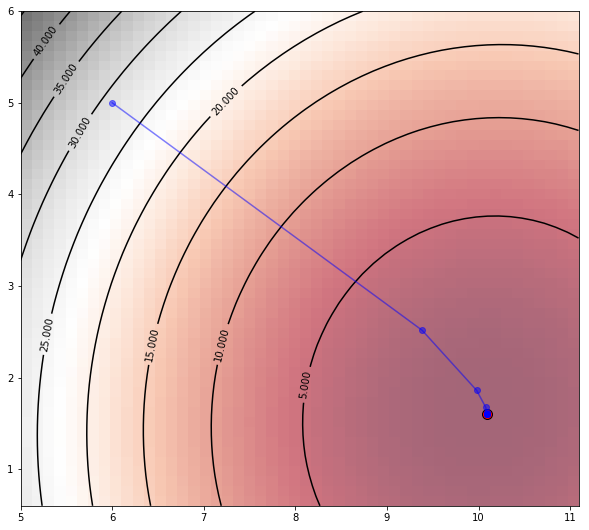

In [9]:
#List of thetas taken for optimization 
theta_initial = np.array([[6],[5]])
path_a, path_b = path_grad_batch(X,Y,theta_initial,eta=0.4)

#Contour plot of the loss function
a = np.linspace(np.min(path_a)-1,np.max(path_a)+1,50)
b = np.linspace(np.min(path_b)-1,np.max(path_b)+1,50)
Z = np.zeros(shape=(len(a),len(b)))
for i in range(len(a)): 
    for j in range(len(b)): 
        guess = np.array([[a[i]],[b[j]]])
        Z[j,i] = loss_func(X,Y,guess)

plt.figure(figsize=(10,10))
contours = plt.contour(a, b, Z, 10, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.imshow(Z, extent=[np.min(a),np.max(a), np.min(b),np.max(b)], origin='lower',
           cmap='RdGy', alpha=0.6)
plt.plot(path_a,path_b,'bo-',alpha=0.5)
plt.scatter(theta_opt[0,0],theta_opt[1,0],s=100,c='red',edgecolor='black')


# Stochastic and Mini-batch Gradient Descent

In [10]:
def loss_func(X,Y,theta):
    return(np.mean((Y-X.dot(theta))**2))

#STOCHASTIC GRADIENT DESCENT 
def stoch_mini_grad_descent(X,Y,theta_guess,batch_size=10,n_iter=1000,eta=0.1,tol=1E-5):
    m = float(np.shape(X)[0])
    for i in range(n_iter):
        random_batch_indices = np.random.randint(m,size=batch_size)
        X_rand = X[random_batch_indices]
        Y_rand = Y[random_batch_indices]
        gradient = 2/np.shape(X_rand)[0] * X_rand.T.dot(X_rand.dot(theta_guess)-Y_rand)
        if np.max(abs(gradient)<=tol):
            return(theta_guess)
            break
        else:
            theta_guess = theta_guess - eta * gradient
    return(theta_guess)

X = x_b.reshape(200,2)
Y = y.reshape(200,1)

theta_guess = np.random.randn(2,1)
theta_opt = stoch_mini_grad_descent(X,Y,theta_guess)
print('BATCH GRADIENT DESCENT')
print('Value of weights: {}, {}'.format(theta_opt[0][0],theta_opt[1][0]))
print('MSE: {}'.format(loss_func(X,Y,theta_opt)))
print('R-square:{}'.format(r2_score(y,X.dot(theta_opt))))

BATCH GRADIENT DESCENT
Value of weights: 10.087573869982418, 1.5117318651778562
MSE: 0.9673846561723529
R-square:0.6949048503528767


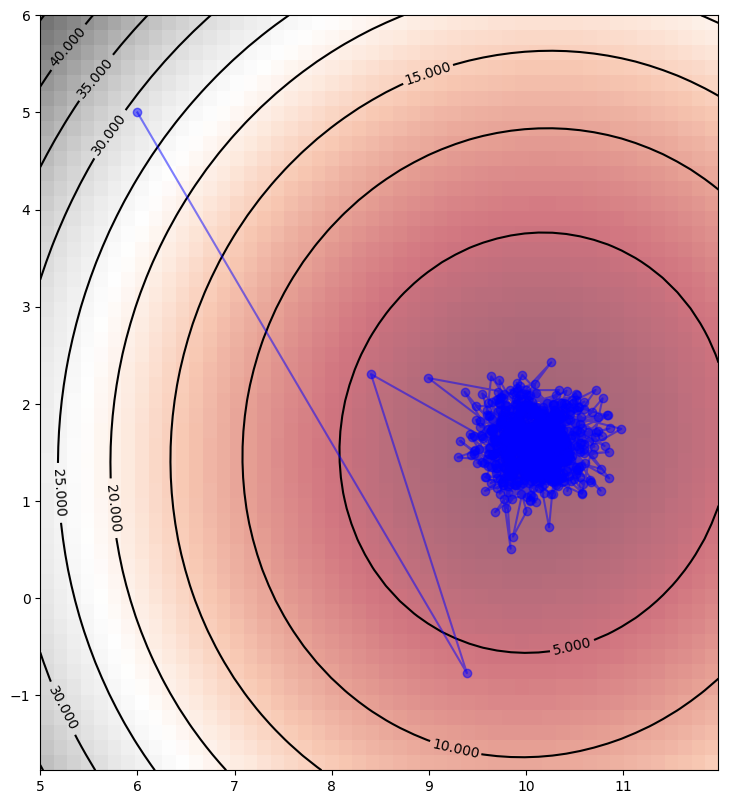

In [11]:
def path_stoch_mini_grad_descent(X,Y,theta_guess,batch_size=1,n_iter=1000,eta=0.1,tol=1E-5):
    m = float(np.shape(X)[0])
    path_a = theta_guess[0]
    path_b = theta_guess[1]
    for i in range(n_iter):
        random_batch_indices = np.random.randint(m,size=batch_size)
        X_rand = X[random_batch_indices]
        Y_rand = Y[random_batch_indices]
        gradient = 2/np.shape(X_rand)[0] * X_rand.T.dot(X_rand.dot(theta_guess)-Y_rand)
        if np.max(abs(gradient)<=tol):
            return(path_a,path_b)
            break
        else:
            theta_guess = theta_guess - eta * gradient
            path_a = np.append(path_a,theta_guess[0][0])
            path_b = np.append(path_b,theta_guess[1][0])
    return(path_a,path_b)

#List of thetas taken for optimization 
theta_initial = np.array([[6],[5]])
path_a, path_b = path_stoch_mini_grad_descent(X,Y,theta_initial,batch_size=10,eta=0.4)

#Contour plot of the loss function
a = np.linspace(np.min(path_a)-1,np.max(path_a)+1,50)
b = np.linspace(np.min(path_b)-1,np.max(path_b)+1,50)
Z = np.zeros(shape=(len(a),len(b)))
for i in range(len(a)): 
    for j in range(len(b)): 
        guess = np.array([[a[i]],[b[j]]])
        Z[j,i] = loss_func(X,Y,guess)

plt.figure(figsize=(10,10),dpi=100)
contours = plt.contour(a, b, Z, 10, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.imshow(Z, extent=[np.min(a),np.max(a), np.min(b),np.max(b)], origin='lower',
           cmap='RdGy', alpha=0.6)
plt.plot(path_a,path_b,'bo-',alpha=0.5)
plt.scatter(theta_opt[0,0],theta_opt[1,0],s=100,c='red',edgecolor='black')

# Stochastic Gradient Descent + Nesterov

The intuition behind momentum is that the previous gradient evaluation(s) potentially give us good information about the direction of the minimum. The analogy comes from the physics of an object rolling down the hill. It will start slowly, but if it is consistently downhill in the same direction, then the object *“accelerates”* toward the minimum. The change in algorithm is tiny but powerful

An even better variant developed by Nesterov calculates the gradient at $x_{i} + \beta m_{i}$ after applying the momentum displacement. That is, on step `i+1` we know the update from momentum alone ($\beta m_{i}$) before we calculate the gradient – so why not calculate the gradient at that point, $x_{i} + \beta m_{i}$, since it is probably closer to $x_{i+1}$ than $x_{i}$ is.

if $\beta = 0$ -- its normal mini-batch stochastic gradient descent

In [12]:
def loss_func(X,Y,theta):
    return(np.mean((Y-X.dot(theta))**2))

#STOCHASTIC GRADIENT DESCENT 
def nestrov_batch_grad_descent(X,Y,theta_guess,beta=0.9,batch_size=10,n_iter=1000,eta=0.1,tol=1E-5):
    feature_size = float(np.shape(X)[0])
    m = np.zeros(shape=(np.shape(theta_guess)[0],1))
    for i in range(n_iter):
        random_batch_indices = np.random.randint(feature_size,size=batch_size)
        X_rand = X[random_batch_indices]
        theta_guess = theta_guess + beta * m 
        Y_rand = Y[random_batch_indices]
        gradient = 2/np.shape(X_rand)[0] * X_rand.T.dot(X_rand.dot(theta_guess)-Y_rand)
        if np.max(abs(gradient)<=tol):
            return(theta_guess)
            break
        else:
            m = beta*m - eta * gradient
            theta_guess = theta_guess + m
    return(theta_guess)

X = x_b.reshape(200,2)
Y = y.reshape(200,1)
theta_guess = np.random.randn(2,1)
theta_opt = nestrov_batch_grad_descent(X,Y,theta_guess)
print('BATCH GRADIENT DESCENT')
print('Value of weights: {}, {}'.format(theta_opt[0][0],theta_opt[1][0]))
print('MSE: {}'.format(loss_func(X,Y,theta_opt)))
print('R-square:{}'.format(r2_score(y,X.dot(theta_opt))))

BATCH GRADIENT DESCENT
Value of weights: 9.607157864649082, 1.868499152912683
MSE: 1.2660765633804527
R-square:0.6007029715587563


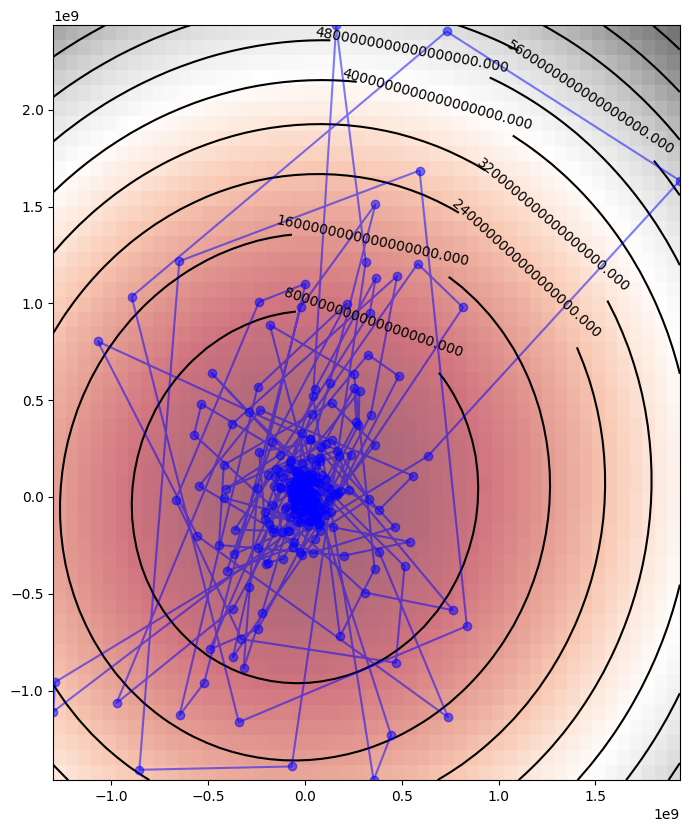

In [13]:
#STOCHASTIC GRADIENT DESCENT 
def nestrov_batch_grad_descent(X,Y,theta_guess,beta=0.9,batch_size=10,n_iter=1000,eta=0.1,tol=1E-5):
    feature_size = float(np.shape(X)[0])
    path_a = theta_guess[0]
    path_b = theta_guess[1]
    m = np.zeros(shape=(np.shape(theta_guess)[0],1))
    for i in range(n_iter):
        random_batch_indices = np.random.randint(feature_size,size=batch_size)
        X_rand = X[random_batch_indices]
        theta_guess = theta_guess + beta * m 
        Y_rand = Y[random_batch_indices]
        gradient = 2/np.shape(X_rand)[0] * X_rand.T.dot(X_rand.dot(theta_guess)-Y_rand)
        if np.max(abs(gradient)<=tol):
            return(path_a,path_b)
            break
        else:
            m = beta*m - eta * gradient
            theta_guess = theta_guess + m
            path_a = np.append(path_a,theta_guess[0][0])
            path_b = np.append(path_b,theta_guess[1][0])
    return(path_a,path_b)

#List of thetas taken for optimization 
theta_initial = np.array([[6],[5]])
path_a, path_b = nestrov_batch_grad_descent(X,Y,theta_initial,beta=0.9,batch_size=10,eta=0.4)

#Contour plot of the loss function
a = np.linspace(np.min(path_a)-1,np.max(path_a)+1,50)
b = np.linspace(np.min(path_b)-1,np.max(path_b)+1,50)
Z = np.zeros(shape=(len(a),len(b)))
for i in range(len(a)): 
    for j in range(len(b)): 
        guess = np.array([[a[i]],[b[j]]])
        Z[j,i] = loss_func(X,Y,guess)

plt.figure(figsize=(10,10),dpi=100)
contours = plt.contour(a, b, Z, 10, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.imshow(Z, extent=[np.min(a),np.max(a), np.min(b),np.max(b)], origin='lower',
           cmap='RdGy', alpha=0.6)
plt.plot(path_a,path_b,'bo-',alpha=0.5)
plt.scatter(theta_opt[0,0],theta_opt[1,0],s=100,c='red',edgecolor='black')

# Polynomial regression

For a data which is not necessarily linear we can still have a linear regression.

> The idea with the linear regression is the linear independence of the parameters and features. The features can non-linear by themselves. 

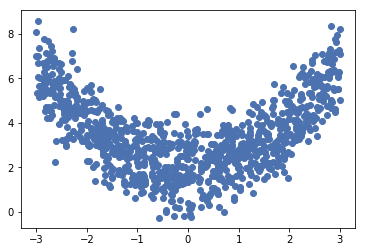

In [14]:
#Generate random non-linear data 
m = 1000 
x = 6 * np.random.rand(m,1) - 3 
y = 0.5 * x**2 + 2 + np.random.randn(m,1)
plt.scatter(x,y)

In [15]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly  = poly_features.fit_transform(x)

In [16]:
lin_reg = LinearRegression() 
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96939633]), array([[0.00427041, 0.50629676]]))

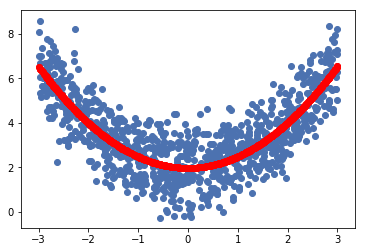

In [17]:
plt.scatter(x,y,label='True data')
plt.scatter(x,lin_reg.predict(x_poly),facecolor='r',label='Prediction')